# Data Visualization

Select a dataset we have used in class (or outside of class).

Generate a plot that you feel visualizes the data is an interesting way. Your plot should have the following elements:

>1) Title
>2) Legend
>3) Axes or other Labels
>4) Color
>5) 1 sentence description of what your plot shows
>6) Brief description of why you chose to make the plot the way you did.

You may use pandas, matplotlib, or seaborn.

Upload a pdf of the plot to Canvas.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

dialogue = pd.read_csv("../data/marvel-dialogue-nlp/data/mcu.csv")
oscar = pd.read_csv("../data/the_oscar_award.csv")
dialogue = pd.DataFrame(dialogue, columns=['character', 'line', 'movie', 'year'])


In [6]:
actchar_map = {'OBADIAH STANE': 'Jeff Bridges as OBADIAH STANE',
 'PEPPER POTTS': 'Gwyneth Paltrow as PEPPER POTTS',
 'SECRETARY ROSS': 'William Hurt as SECRETARY ROSS',
 'JUSTIN HAMMER': 'Sam Rockwell as JUSTIN HAMMER',
 'JANE FOSTER': 'Natalie Portman as JANE FOSTER',
 'ODIN': 'Anthony Hopkins as ODIN',
 'COL. CHESTER PHILLIPS': 'Tommy Lee Jones as COL. CHESTER PHILLIPS',
 'THE MANDARIN': 'Ben Kingsley as THE MANDARIN',
 'ALEXANDER PIERCE': 'Robert Redford as ALEXANDER PIERCE',
 'THE COLLECTOR': 'Benicio del Toro as THE COLLECTOR',
 'HANK PYM': 'Michael Douglas as HANK PYM',
 'MAY PARKER': 'Marisa Tomei as MAY PARKER',
 'ANCIENT ONE': 'Tilda Swinton as ANCIENT ONE',
 'KAREN': 'Jennifer Connelly as KAREN',
 'HELA': 'Cate Blanchett as HELA',
 'ACTOR LOKI': 'Matt Damon as ACTOR LOKI',
 'KORG': 'Taika Waititi as KORG',
 'ZURI': 'Forest Whitaker as ZURI',
 'NAKIA': 'Lupita Nyong’o as NAKIA',
 "W'KABI": "Daniel Kaluuya as W'KABI",
 'CAROL DANVERS': 'Brie Larson as CAROL DANVERS'}

In [13]:
oscar_map = {
'OBADIAH STANE': 2017,
 'ALEXANDER PIERCE': 1995,
 'THE MANDARIN': 2004,
 None: 2019,
 'SECRETARY ROSS': 2006,
 'HANK PYM': 1988,
 'ODIN': 2020,
 'COL. CHESTER PHILLIPS': 2013,
 'MAY PARKER': 2009,
 'ACTOR LOKI': 2016,
 'HELA': 2016,
 'PEPPER POTTS': 1999,
 'KAREN': 2002,
 'JANE FOSTER': 2017,
 'ZURI': 2007,
 'ANCIENT ONE': 2008,
 'CAROL DANVERS': 2016,
 "W'KABI": 2018,
 'JUSTIN HAMMER': 2019
}

In [14]:
def check_after_oscar(row):
    character = row['character']
    year = row['year']
    
    if character in oscar_map and oscar_map[character] < year:
        return True
    else:
        return False

# Assuming your DataFrame is named 'dialogue'
dialogue['after_oscar'] = dialogue.apply(check_after_oscar, axis=1)

dialogue[dialogue['after_oscar'] == True]

,character,line,movie,year,after_oscar
35,PEPPER POTTS,"Tony, it’s the President. Wants to congratula...",Iron Man,2008,True
37,PEPPER POTTS,You’re leaving the country for a week. I need...,Iron Man,2008,True
39,PEPPER POTTS,The Board meeting is on the eleventh. Should ...,Iron Man,2008,True
58,PEPPER POTTS,"Don’t worry, that’s Jarvis -- he runs the hous...",Iron Man,2008,True
60,PEPPER POTTS,Cab’s waiting outside.,Iron Man,2008,True
...,...,...,...,...,...
15627,PEPPER POTTS,"Hang on, kid. I’ve got you.",Avengers: Endgame,2019,True
15636,CAROL DANVERS,Roger...Rogers...,Avengers: Endgame,2019,True
15639,CAROL DANVERS,"Hey, Peter Parker. You got something for me?",Avengers: Endgame,2019,True
15648,PEPPER POTTS,"Hey, Friday, what’ve we got?",Avengers: Endgame,2019,True


In [16]:
dialogue['role'] = dialogue['character'].map(actchar_map.get)


In [17]:
owd = pd.DataFrame(columns=['role', 'before_oscar', 'after_oscar'])
actchar_df = pd.DataFrame(actchar_map.items(), columns=['role', 'actor'])
owd = pd.concat([owd, actchar_df], ignore_index=True)

lines_before_oscar = dialogue[dialogue['after_oscar'] == False]
boc_dict = pd.DataFrame(lines_before_oscar['role'].value_counts()).to_dict('index')

lines_after_oscar = dialogue[dialogue['after_oscar'] == True]
aoc_dict = pd.DataFrame(lines_after_oscar['role'].value_counts()).to_dict('index')


aoc_dict

{'Gwyneth Paltrow as PEPPER POTTS': {'role': 442},
 'Brie Larson as CAROL DANVERS': {'role': 234},
 'Michael Douglas as HANK PYM': {'role': 146},
 'Jennifer Connelly as KAREN': {'role': 67},
 'Robert Redford as ALEXANDER PIERCE': {'role': 60},
 'Marisa Tomei as MAY PARKER': {'role': 45},
 'Cate Blanchett as HELA': {'role': 32},
 'William Hurt as SECRETARY ROSS': {'role': 24},
 'Forest Whitaker as ZURI': {'role': 21},
 'Ben Kingsley as THE MANDARIN': {'role': 16},
 'Tilda Swinton as ANCIENT ONE': {'role': 16},
 'Matt Damon as ACTOR LOKI': {'role': 11},
 'Natalie Portman as JANE FOSTER': {'role': 2}}

In [18]:
def get_count(s, d):
    if s in d.keys():
        return d[s]['role']
    else:
        return 0

In [19]:
owd['before_oscar'] = owd['actor'].apply(lambda x: get_count(x, boc_dict))
owd['after_oscar'] = owd['actor'].apply(lambda x: get_count(x, aoc_dict))

In [20]:
owd['sum_oscar'] = owd.before_oscar + owd.after_oscar

In [21]:
owd = owd.sort_values(by='sum_oscar', ascending=False)

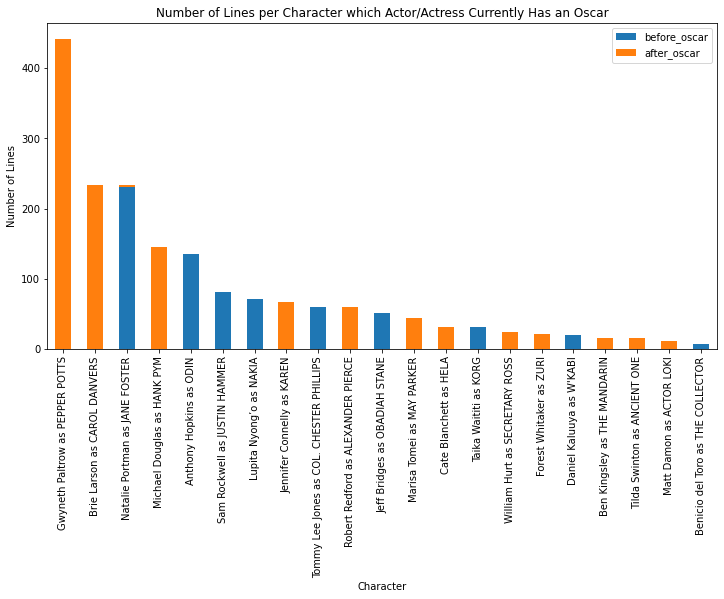

In [39]:
plot = owd[['actor','before_oscar',"after_oscar"]].plot(stacked=True,kind='bar',figsize=(12,6))
plot.set_xticklabels(owd['actor']);
plt.xlabel('Character')
plt.ylabel('Number of Lines')
plt.title('Number of Lines per Character which Actor/Actress Currently Has an Oscar')
plt.legend()
plot.figure.savefig('Oscar_MCU.pdf',bbox_inches="tight")
plt.show()


In [31]:
#5. 1 sentence description of what your plot shows
print("My plot shows how many lines each Oscar-winning MCU characters has said in the entire MCU dialogue.")

My plot shows how many lines each Oscar-winning MCU characters has said in the entire MCU dialogue.


In [33]:
#6. Brief description of why you chose to make the plot the way you did.
print("I chose a stacked graph so I can represent number of lines before and after an actor/actress has won an Oscar."
      "The blue lengend in the stacked graph represent lines said by a actor/actress before winning an Oscar; orange represent after.")

I chose a stacked graph so I can represent number of lines before and after an actor/actress has won an Oscar.The blue lengend in the stacked graph represent lines said by a actor/actress before winning an Oscar; orange represent after.
